In [29]:
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from keras.applications import VGG16
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing import image
import numpy as np
from keras.applications.xception import Xception

In [2]:
train = "D:/Cats_and_Dogs/train-20230310T161845Z-001/train"
val =   "D:/Cats_and_Dogs/val-20230310T163347Z-001/val"
test =  "D:/Cats_and_Dogs/test-20230310T163058Z-001/test"

img_width, img_height, channels = 150, 150, 3 # you can try different sizes

# input shape
input_shape = (img_width, img_height, 3)
# position matters!
# Number_of_channels can be at the first or the last position
# in our case - "channels last"

# minibatch size
batch_size = 64

In [3]:
datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = datagen.flow_from_directory(
    train,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

val_generator = datagen.flow_from_directory(
    val,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

test_generator = datagen.flow_from_directory(
    test,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 20000 images belonging to 2 classes.
Found 2490 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


In [4]:
nb_train_samples = 20000
nb_validation_samples = 2490
nb_test_samples = 2500

In [5]:
model_1_15 = Sequential()

model_1_15.add(Conv2D(16, (3, 3), input_shape=(150, 150, 3)))
model_1_15.add(Activation('relu'))

model_1_15.add(MaxPooling2D(pool_size=(2, 2)))

model_1_15.add(Conv2D(32, (3, 3)))
model_1_15.add(Activation('relu'))

model_1_15.add(MaxPooling2D(pool_size=(2, 2)))

model_1_15.add(Conv2D(64, (3, 3)))
model_1_15.add(Activation('relu'))

model_1_15.add(MaxPooling2D(pool_size=(2, 2)))

model_1_15.add(Flatten())

model_1_15.add(Dense(64))
model_1_15.add(Activation('relu'))

model_1_15.add(Dropout(0.5))

model_1_15.add(Dense(1))
model_1_15.add(Activation('sigmoid'))

In [6]:
model_1_15.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [7]:
history_1_15 = model_1_15.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=15,
    validation_data=val_generator,
    validation_steps=nb_validation_samples // batch_size)

C:\Users\andre\AppData\Local\Temp\ipykernel_16240\2995807042.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history_1_15 = model_1_15.fit_generator(


Epoch 1/15
312/312 [==============================] - 125s 393ms/step - loss: 0.5922 - accuracy: 0.6788 - val_loss: 0.4783 - val_accuracy: 0.7701
Epoch 2/15
312/312 [==============================] - 115s 369ms/step - loss: 0.4802 - accuracy: 0.7715 - val_loss: 0.4481 - val_accuracy: 0.7887
Epoch 3/15
312/312 [==============================] - 113s 361ms/step - loss: 0.4217 - accuracy: 0.8101 - val_loss: 0.4171 - val_accuracy: 0.8035
Epoch 4/15
312/312 [==============================] - 114s 366ms/step - loss: 0.3746 - accuracy: 0.8388 - val_loss: 0.4004 - val_accuracy: 0.8236
Epoch 5/15
312/312 [==============================] - 126s 404ms/step - loss: 0.3370 - accuracy: 0.8557 - val_loss: 0.3766 - val_accuracy: 0.8310
Epoch 6/15
312/312 [==============================] - 106s 339ms/step - loss: 0.2909 - accuracy: 0.8727 - val_loss: 0.3788 - val_accuracy: 0.8261
Epoch 7/15
312/312 [==============================] - 112s 359ms/step - loss: 0.2478 - accuracy: 0.8966 - val_loss: 0.3905 -

In [11]:
scores_15 = model_1_15.evaluate_generator(test_generator, nb_test_samples // batch_size)
print("Accuracy on test data: %.2f%%" % (scores_15[1]*100))

C:\Users\andre\AppData\Local\Temp\ipykernel_16240\1273196647.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  scores_15 = model_1_15.evaluate_generator(test_generator, nb_test_samples // batch_size)


Accuracy on test data: 85.18%


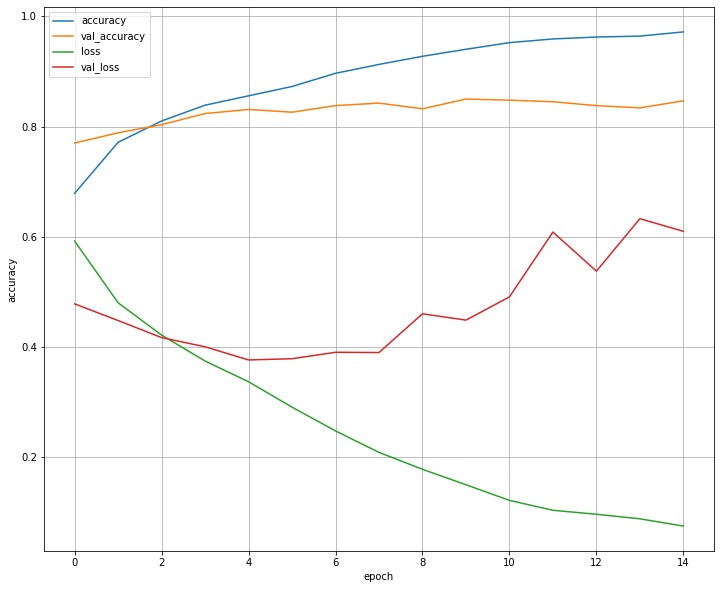

In [12]:
plt.figure(figsize=(12, 10))
plt.plot(history_1_15.history['accuracy'])
plt.plot(history_1_15.history['val_accuracy'])
plt.plot(history_1_15.history['loss'])
plt.plot(history_1_15.history['val_loss'])
plt.grid()
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'val_accuracy','loss', 'val_loss'], loc='best')
plt.show()

In [13]:
model_1_20 = Sequential()

model_1_20.add(Conv2D(16, (3, 3), input_shape=(150, 150, 3)))
model_1_20.add(Activation('relu'))

model_1_20.add(MaxPooling2D(pool_size=(2, 2)))

model_1_20.add(Conv2D(32, (3, 3)))
model_1_20.add(Activation('relu'))

model_1_20.add(MaxPooling2D(pool_size=(2, 2)))

model_1_20.add(Conv2D(64, (3, 3)))
model_1_20.add(Activation('relu'))

model_1_20.add(MaxPooling2D(pool_size=(2, 2)))

model_1_20.add(Flatten())

model_1_20.add(Dense(64))
model_1_20.add(Activation('relu'))

model_1_20.add(Dropout(0.5))

model_1_20.add(Dense(1))
model_1_20.add(Activation('sigmoid'))

In [15]:
model_1_20.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [16]:
history_1_20 = model_1_20.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=20,
    validation_data=val_generator,
    validation_steps=nb_validation_samples // batch_size)

Epoch 1/20


C:\Users\andre\AppData\Local\Temp\ipykernel_16240\3755502348.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history_1_20 = model_1_20.fit_generator(


312/312 [==============================] - 135s 427ms/step - loss: 0.6185 - accuracy: 0.6470 - val_loss: 0.5413 - val_accuracy: 0.7307
Epoch 2/20
312/312 [==============================] - 145s 463ms/step - loss: 0.5110 - accuracy: 0.7543 - val_loss: 0.4645 - val_accuracy: 0.7936
Epoch 3/20
312/312 [==============================] - 141s 452ms/step - loss: 0.4496 - accuracy: 0.8001 - val_loss: 0.4495 - val_accuracy: 0.7977
Epoch 4/20
312/312 [==============================] - 133s 427ms/step - loss: 0.4022 - accuracy: 0.8241 - val_loss: 0.4307 - val_accuracy: 0.8047
Epoch 5/20
312/312 [==============================] - 93s 300ms/step - loss: 0.3640 - accuracy: 0.8435 - val_loss: 0.4116 - val_accuracy: 0.8109
Epoch 6/20
312/312 [==============================] - 118s 376ms/step - loss: 0.3203 - accuracy: 0.8658 - val_loss: 0.3868 - val_accuracy: 0.8302
Epoch 7/20
312/312 [==============================] - 118s 379ms/step - loss: 0.2874 - accuracy: 0.8783 - val_loss: 0.3705 - val_accurac

In [17]:
scores_20 = model_1_20.evaluate_generator(test_generator, nb_test_samples // batch_size)
print("Accuracy on test data: %.2f%%" % (scores_20[1]*100))

C:\Users\andre\AppData\Local\Temp\ipykernel_16240\2780488349.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  scores_20 = model_1_20.evaluate_generator(test_generator, nb_test_samples // batch_size)


Accuracy on test data: 85.58%


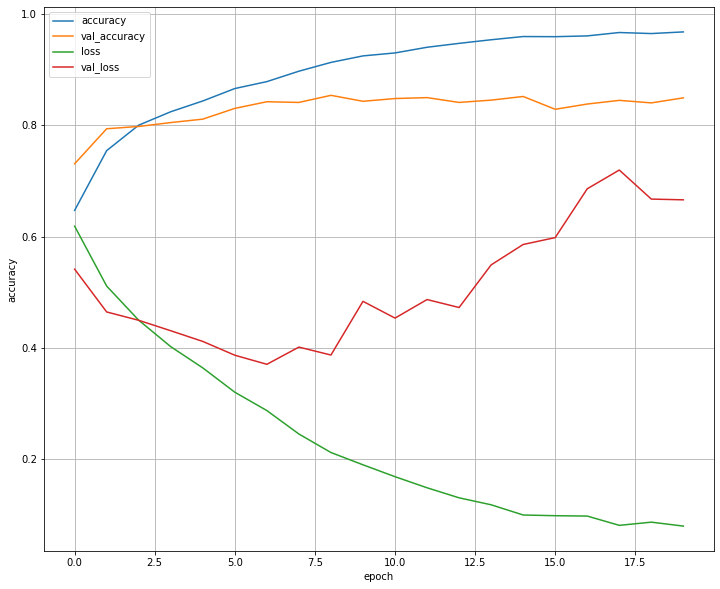

In [18]:
plt.figure(figsize=(12, 10))
plt.plot(history_1_20.history['accuracy'])
plt.plot(history_1_20.history['val_accuracy'])
plt.plot(history_1_20.history['loss'])
plt.plot(history_1_20.history['val_loss'])
plt.grid()
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'val_accuracy','loss', 'val_loss'], loc='best')
plt.show()

In [19]:
vgg16_net = VGG16(weights='imagenet', 
                  include_top=False,      # we take only the "convolution" part, the last layers we add ourselves
                  input_shape=(150, 150, 3))
vgg16_net.trainable = False               

vgg16_net.summary()  

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [20]:
model_2 = Sequential()
model_2.add(vgg16_net)

model_2.add(Flatten())

model_2.add(Dense(256))
model_2.add(Activation('relu'))

model_2.add(Dropout(0.5))

model_2.add(Dense(1))
model_2.add(Activation('sigmoid'))

model_2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 8192)              0         
                                                                 
 dense_4 (Dense)             (None, 256)               2097408   
                                                                 
 activation_10 (Activation)  (None, 256)               0         
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 1)                 257       
                                                                 
 activation_11 (Activation)  (None, 1)                

In [21]:
model_2.compile(loss='binary_crossentropy',
              optimizer=Adam(lr=1e-5), 
              metrics=['accuracy'])

C:\Users\andre\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


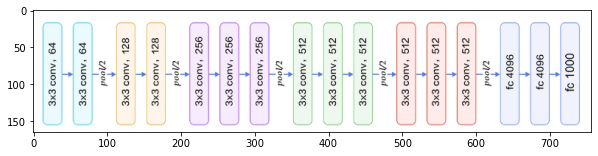

In [23]:
img = mpimg.imread('D:/Cats_and_Dogs/VGG16.png')
plt.figure(figsize = (10,20))
plt.imshow(img)
plt.show()

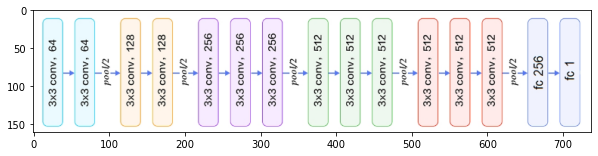

In [24]:
img = mpimg.imread('D:/Cats_and_Dogs/VGG162.png')
plt.figure(figsize = (10,20))
plt.imshow(img)
plt.show()

In [25]:
history_2 = model_2.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=5,
    validation_data=val_generator,
    validation_steps=nb_validation_samples // batch_size)

C:\Users\andre\AppData\Local\Temp\ipykernel_16240\60814151.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history_2 = model_2.fit_generator(


Epoch 1/5
312/312 [==============================] - 845s 3s/step - loss: 0.5146 - accuracy: 0.7409 - val_loss: 0.3574 - val_accuracy: 0.8553
Epoch 2/5
312/312 [==============================] - 1138s 4s/step - loss: 0.3468 - accuracy: 0.8520 - val_loss: 0.3036 - val_accuracy: 0.8742
Epoch 3/5
312/312 [==============================] - 1149s 4s/step - loss: 0.3023 - accuracy: 0.8721 - val_loss: 0.2773 - val_accuracy: 0.8898
Epoch 4/5
312/312 [==============================] - 1158s 4s/step - loss: 0.2776 - accuracy: 0.8818 - val_loss: 0.2629 - val_accuracy: 0.8919
Epoch 5/5
312/312 [==============================] - 1153s 4s/step - loss: 0.2625 - accuracy: 0.8891 - val_loss: 0.2513 - val_accuracy: 0.8997


In [26]:
scores_2 = model_2.evaluate_generator(test_generator, nb_test_samples // batch_size)
print("Accuracy on test data: %.2f%%" % (scores_2[1]*100))

C:\Users\andre\AppData\Local\Temp\ipykernel_16240\3331529659.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  scores_2 = model_2.evaluate_generator(test_generator, nb_test_samples // batch_size)


Accuracy on test data: 88.78%


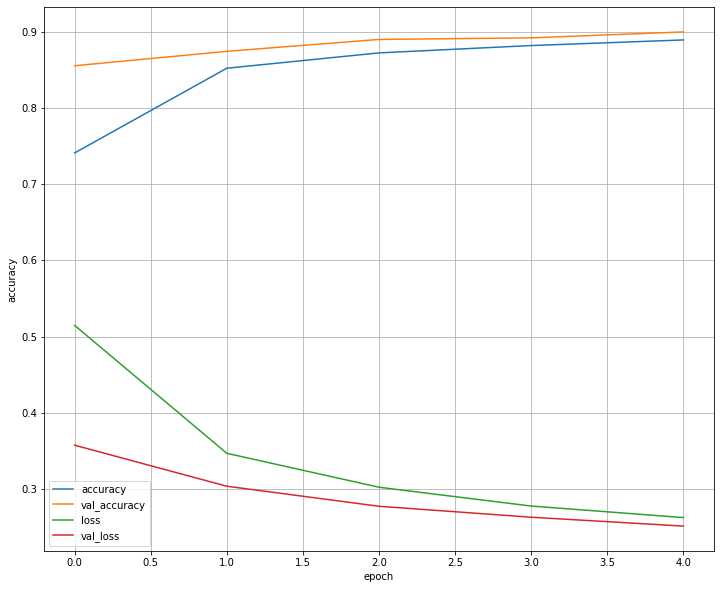

In [27]:
plt.figure(figsize=(12, 10))
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.grid()
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'val_accuracy','loss', 'val_loss'], loc='best')
plt.show()

In [30]:
xception = Xception(weights='imagenet',
                    include_top=False,
                    input_shape=(150, 150, 3))
xception.trainable = False
xception.summary()

83683744/83683744 [==============================] - 5s 0us/step
Model: "xception"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 74, 74, 32)   864         ['input_2[0][0]']                
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 74, 74, 32)  128         ['block1_conv1[0][0]']           
 ation)                                                                                           
                          

                                                                                                  
 block4_sepconv2_act (Activatio  (None, 18, 18, 728)  0          ['block4_sepconv1_bn[0][0]']     
 n)                                                                                               
                                                                                                  
 block4_sepconv2 (SeparableConv  (None, 18, 18, 728)  536536     ['block4_sepconv2_act[0][0]']    
 2D)                                                                                              
                                                                                                  
 block4_sepconv2_bn (BatchNorma  (None, 18, 18, 728)  2912       ['block4_sepconv2[0][0]']        
 lization)                                                                                        
                                                                                                  
 conv2d_8 

 block7_sepconv1 (SeparableConv  (None, 9, 9, 728)   536536      ['block7_sepconv1_act[0][0]']    
 2D)                                                                                              
                                                                                                  
 block7_sepconv1_bn (BatchNorma  (None, 9, 9, 728)   2912        ['block7_sepconv1[0][0]']        
 lization)                                                                                        
                                                                                                  
 block7_sepconv2_act (Activatio  (None, 9, 9, 728)   0           ['block7_sepconv1_bn[0][0]']     
 n)                                                                                               
                                                                                                  
 block7_sepconv2 (SeparableConv  (None, 9, 9, 728)   536536      ['block7_sepconv2_act[0][0]']    
 2D)      

                                                                                                  
 add_7 (Add)                    (None, 9, 9, 728)    0           ['block9_sepconv3_bn[0][0]',     
                                                                  'add_6[0][0]']                  
                                                                                                  
 block10_sepconv1_act (Activati  (None, 9, 9, 728)   0           ['add_7[0][0]']                  
 on)                                                                                              
                                                                                                  
 block10_sepconv1 (SeparableCon  (None, 9, 9, 728)   536536      ['block10_sepconv1_act[0][0]']   
 v2D)                                                                                             
                                                                                                  
 block10_s

 on)                                                                                              
                                                                                                  
 block12_sepconv3 (SeparableCon  (None, 9, 9, 728)   536536      ['block12_sepconv3_act[0][0]']   
 v2D)                                                                                             
                                                                                                  
 block12_sepconv3_bn (BatchNorm  (None, 9, 9, 728)   2912        ['block12_sepconv3[0][0]']       
 alization)                                                                                       
                                                                                                  
 add_10 (Add)                   (None, 9, 9, 728)    0           ['block12_sepconv3_bn[0][0]',    
                                                                  'add_9[0][0]']                  
          

In [31]:
model_xception = Sequential()

model_xception.add(xception)

model_xception.add(Flatten())

model_xception.add(Dense(256))
model_xception.add(Activation('relu'))

model_xception.add(Dropout(0.5))

model_xception.add(Dense(1))
model_xception.add(Activation('sigmoid'))

model_xception.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 5, 5, 2048)        20861480  
                                                                 
 flatten_3 (Flatten)         (None, 51200)             0         
                                                                 
 dense_6 (Dense)             (None, 256)               13107456  
                                                                 
 activation_12 (Activation)  (None, 256)               0         
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_7 (Dense)             (None, 1)                 257       
                                                                 
 activation_13 (Activation)  (None, 1)                

In [32]:
model_xception.compile(loss='binary_crossentropy',
              optimizer=Adam(lr=1e-5), 
              metrics=['accuracy'])

In [33]:
history_3=model_xception.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=5,
    validation_data=val_generator,
    validation_steps=nb_validation_samples // batch_size)

C:\Users\andre\AppData\Local\Temp\ipykernel_16240\452428303.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history_3=model_xception.fit_generator(


Epoch 1/5
312/312 [==============================] - 430s 1s/step - loss: 0.1168 - accuracy: 0.9501 - val_loss: 0.0917 - val_accuracy: 0.9613
Epoch 2/5
312/312 [==============================] - 470s 2s/step - loss: 0.0736 - accuracy: 0.9716 - val_loss: 0.0847 - val_accuracy: 0.9626
Epoch 3/5
312/312 [==============================] - 501s 2s/step - loss: 0.0586 - accuracy: 0.9785 - val_loss: 0.0852 - val_accuracy: 0.9663
Epoch 4/5
312/312 [==============================] - 505s 2s/step - loss: 0.0493 - accuracy: 0.9821 - val_loss: 0.0845 - val_accuracy: 0.9634
Epoch 5/5
312/312 [==============================] - 516s 2s/step - loss: 0.0406 - accuracy: 0.9855 - val_loss: 0.0856 - val_accuracy: 0.9642


In [34]:
scores_3 = model_xception.evaluate_generator(test_generator, nb_test_samples // batch_size)
print("Accuracy on test data: %.2f%%" % (scores_3[1]*100))

C:\Users\andre\AppData\Local\Temp\ipykernel_16240\3266234614.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  scores_3 = model_xception.evaluate_generator(test_generator, nb_test_samples // batch_size)


Accuracy on test data: 95.83%


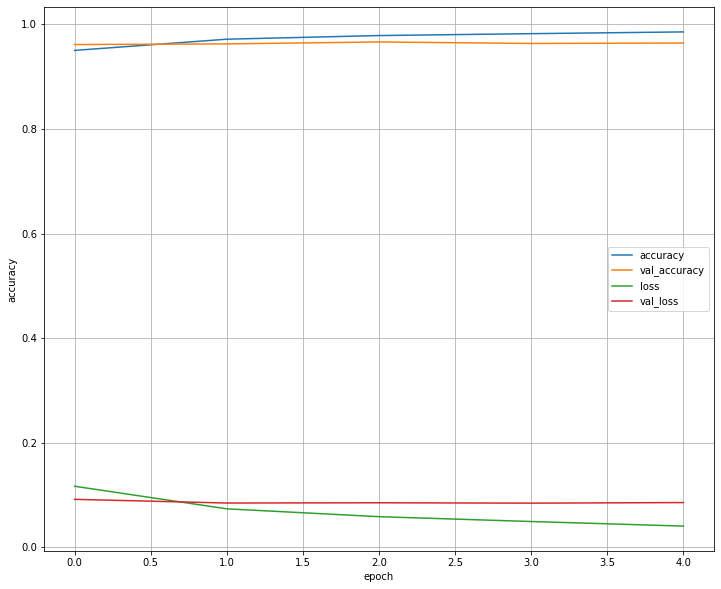

In [35]:
plt.figure(figsize=(12, 10))
plt.plot(history_3.history['accuracy'])
plt.plot(history_3.history['val_accuracy'])
plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])
plt.grid()
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'val_accuracy','loss', 'val_loss'], loc='best')
plt.show()

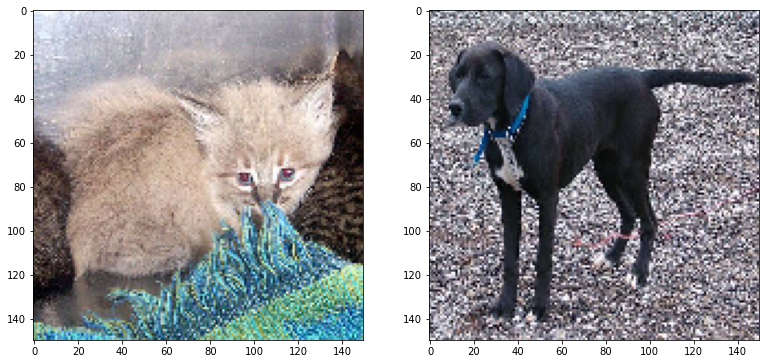

In [36]:
cat = image.load_img("D:/Cats_and_Dogs/val-20230310T163347Z-001/val/cats/cat.11336.jpg", target_size=(150, 150))
dog = image.load_img("D:/Cats_and_Dogs/val-20230310T163347Z-001/val/dogs/dog.11263.jpg", target_size=(150, 150))

plt.figure(figsize=(13,13))
plt.subplot(1,2,1)
plt.imshow(cat)
plt.subplot(1,2,2)
plt.imshow(dog)
plt.show()

In [37]:
x_cat = image.img_to_array(cat)
x_dog = image.img_to_array(dog)

x_cat = np.expand_dims(x_cat, axis=0)
x_dog = np.expand_dims(x_dog, axis=0)
cat_feature = np.vstack([x_cat])
dog_feature = np.vstack([x_dog])

In [44]:
cat_predcited_1 = 'a dog' if model_1_20.predict(cat_feature, batch_size=1) > 0.5 else 'a cat'
dog_predcited_1 = 'a dog' if model_1_20.predict(dog_feature, batch_size=1) > 0.5 else 'a cat'
print(f"First prediction is {cat_predcited_1}. First right answer is a cat\nSecond prediction is {dog_predcited_1}. Second right answer is a dog")

1/1 [==============================] - 0s 32ms/step
First prediction is a dog. First right answer is a cat
Second prediction is a dog. Second right answer is a dog


In [45]:
cat_predcited_2 = 'a dog' if model_2.predict(cat_feature, batch_size=1) > 0.5 else 'a cat'
dog_predcited_2 = 'a dog' if model_2.predict(dog_feature, batch_size=1) > 0.5 else 'a cat'
print(f"First prediction is {cat_predcited_2}. First right answer is a cat\nSecond prediction is {dog_predcited_2}. Second right answer is a dog")

1/1 [==============================] - 0s 96ms/step
First prediction is a cat. First right answer is a cat
Second prediction is a dog. Second right answer is a dog


In [46]:
cat_predcited_3 = 'a dog' if model_xception.predict(cat_feature, batch_size=1) > 0.5 else 'a cat'
dog_predcited_3 = 'a dog' if model_xception.predict(dog_feature, batch_size=1) > 0.5 else 'a cat'
print(f"First prediction is {cat_predcited_3}. First right answer is a cat\nSecond prediction is {dog_predcited_3}. Second right answer is a dog")

1/1 [==============================] - 0s 79ms/step
First prediction is a dog. First right answer is a cat
Second prediction is a dog. Second right answer is a dog
